Reducing the number of input variables for a predictive model is referred to as dimensionality reduction.

Fewer input variables can result in a simpler predictive model that may have better performance when making predictions on new data.

Perhaps the most popular technique for dimensionality reduction in machine learning is Principal Component Analysis, or PCA for short. This is a technique that comes from the field of linear algebra and can be used as a data preparation technique to create a projection of a dataset prior to fitting a model.

# (Dimensionality reduction and PCA)


Dimensionality reduction refers to reducing the number of input variables for a dataset.

If your data is represented using rows and columns, such as in a spreadsheet, then the input variables are the columns that are fed as input to a model to predict the target variable. Input variables are also called features.

We can consider the columns of data representing dimensions on an n-dimensional feature space and the rows of data as points in that space. This is a useful geometric interpretation of a dataset.

    In a dataset with k numeric attributes, you can visualize the data as a cloud of points in k-dimensional space …

— Page 305, Data Mining: Practical Machine Learning Tools and Techniques, 4th edition, 2016.

Having a large number of dimensions in the feature space can mean that the volume of that space is very large, and in turn, the points that we have in that space (rows of data) often represent a small and non-representative sample.

This can dramatically impact the performance of machine learning algorithms fit on data with many input features, generally referred to as the “curse of dimensionality.”

Therefore, it is often desirable to reduce the number of input features. This reduces the number of dimensions of the feature space, hence the name “dimensionality reduction.”

A popular approach to dimensionality reduction is to use techniques from the field of linear algebra. This is often called “feature projection” and the algorithms used are referred to as “projection methods.”

Projection methods seek to reduce the number of dimensions in the feature space whilst also preserving the most important structure or relationships between the variables observed in the data.

    When dealing with high dimensional data, it is often useful to reduce the dimensionality by projecting the data to a lower dimensional subspace which captures the “essence” of the data. This is called dimensionality reduction.

— Page 11, Machine Learning: A Probabilistic Perspective, 2012.

The resulting dataset, the projection, can then be used as input to train a machine learning model.

In essence, the original features no longer exist and new features are constructed from the available data that are not directly comparable to the original data, e.g. don’t have column names.

Any new data that is fed to the model in the future when making predictions, such as test dataset and new datasets, must also be projected using the same technique.

Principal Component Analysis, or PCA, might be the most popular technique for dimensionality reduction.

    The most common approach to dimensionality reduction is called principal components analysis or PCA.

— Page 11, Machine Learning: A Probabilistic Perspective, 2012.

It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data.

The PCA method can be described and implemented using the tools of linear algebra, specifically a matrix decomposition like an Eigendecomposition or SVD.

    PCA can be defined as the orthogonal projection of the data onto a lower dimensional linear space, known as the principal subspace, such that the variance of the projected data is maximized

— Page 561, Pattern Recognition and Machine Learning, 2006.

Now that we are familiar with PCA for dimensionality reduction, let’s look at how we can use this approach with the scikit-learn library

## (Preparing the data )

In [24]:
import pandas as pd 
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
# counting the duplicates and cleaning them 
print(len(df)-len(df.drop_duplicates()))
df = df.drop_duplicates()
df

240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


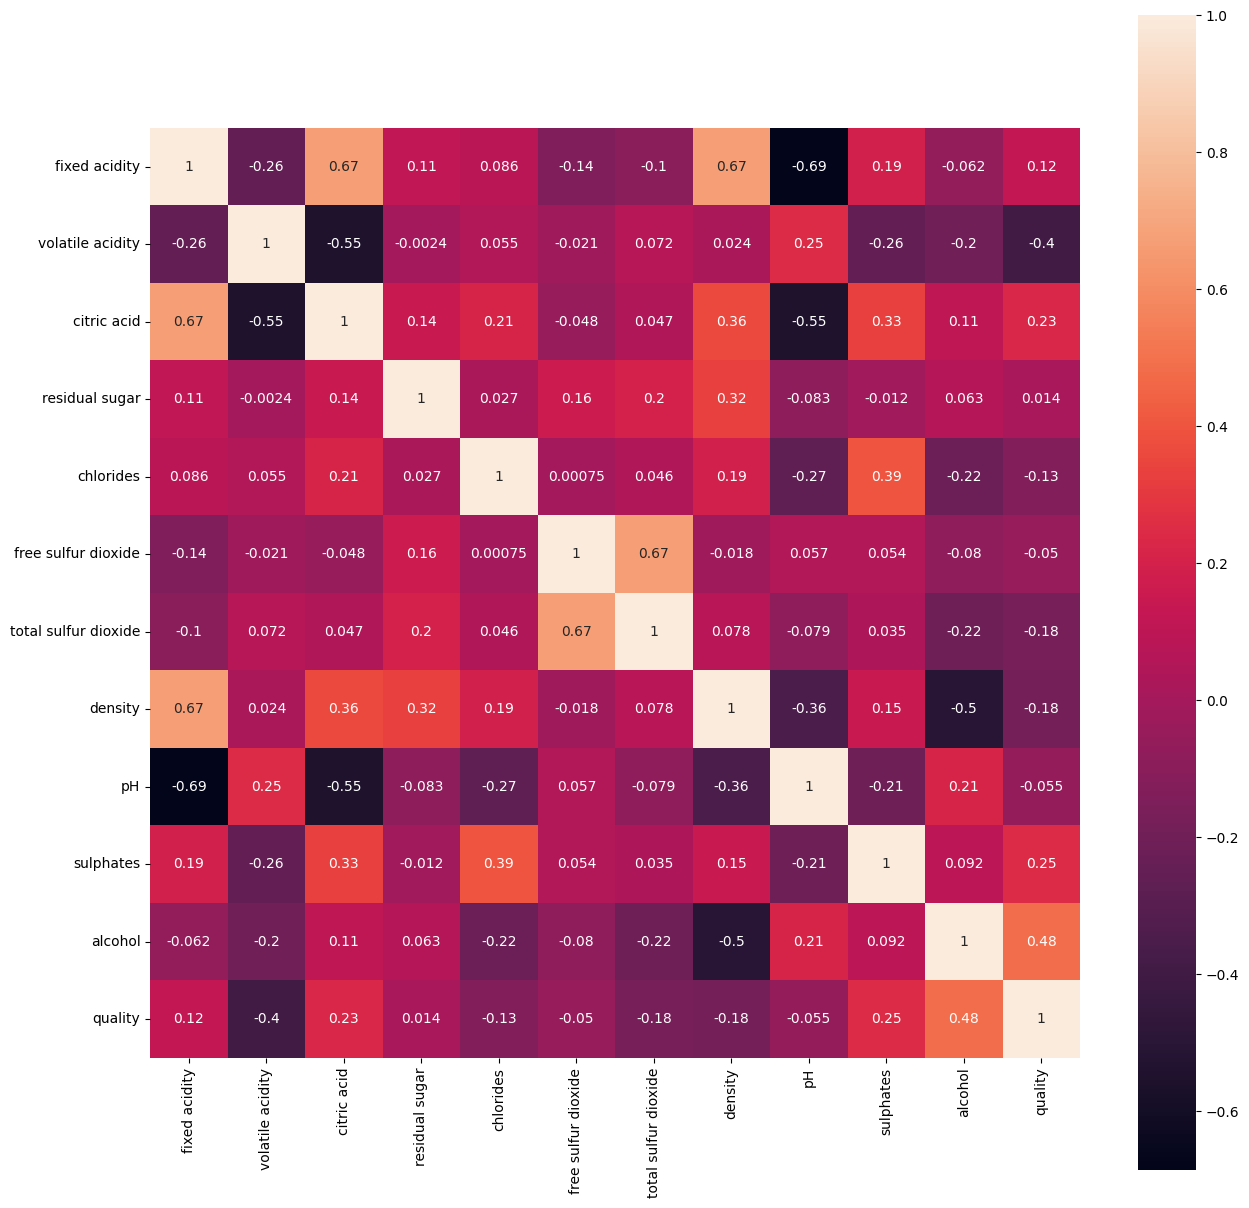

In [27]:
# Analysing Correlation matrix
corr = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
heat = sns.heatmap(corr, vmax=1, square=True, annot=True)


Now in this graph we can clearly see that alcohol and our label has high correlation normaly I would have dropped this but, lets keep it I want to see what pca will do about it 

In [28]:
# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
labels = df.pop("quality")
scaler = StandardScaler()
data = scaler.fit_transform(df)
X_train, X_test, Y_train, Y_test = train_test_split(data,labels)

Now lets do a simple regression model to predict wine quality

In [51]:
from sklearn.linear_model import SGDClassifier
SGDC1 = SGDClassifier()
SGDC1.fit(X_train,Y_train)

SGDClassifier()

In [52]:
pred1 = SGDC1.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred1)*100)

57.647058823529406


Now our SGDClassifier is 57 percent accurate lets see if PCA analysis changes that 

In [53]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
transformed = pca.transform(data)

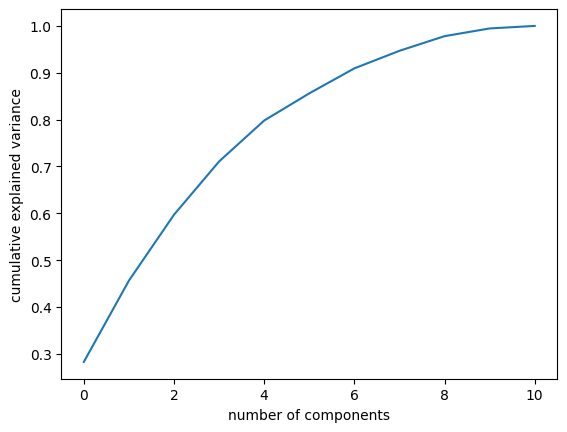

In [54]:
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()

This tells us that %90 of our variance can be explained using 6 components

Lets train our model with transformed inputs


In [55]:
px_train, px_test, py_train, py_test = train_test_split(transformed,labels)


In [56]:
SGDC2 = SGDClassifier()
SGDC2.fit(px_train,py_train)

SGDClassifier()

In [57]:
pred2 = SGDC2.predict(px_test)
print(accuracy_score(py_test,pred2)*100)

53.529411764705884


Can we make it better using select k best algorithm ? 


In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [62]:
select = SelectKBest(score_func=chi2,k=6)
z = select.fit_transform(df,labels)

In [63]:
filter = select.get_support()

In [68]:
print("fixed acidity - volatile acidity - citric acid - free sulfur dioxide - total sulfur dioxide - alcohol")



fixed acidity - volatile acidity - citric acid - free sulfur dioxide - total sulfur dioxide - alcohol


In [79]:
kbest = df[["fixed acidity","volatile acidity","citric acid","free sulfur dioxide","total sulfur dioxide","alcohol"]]

In [80]:
kx_train, kx_test, ky_train, ky_test = train_test_split(kbest,labels)

In [96]:
SGDC3 = SGDClassifier()
SGDC3.fit(kx_train,ky_train)
pred3 = SGDC3.predict(kx_test)
print(accuracy_score(ky_test,pred3)*100)

36.17647058823529
